In [3]:
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import os, librosa
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
import IPython.display as ipd
import seaborn as sns
from tensorflow import keras
from keras.utils import to_categorical
from keras import layers, Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from warnings import filterwarnings
import matplotlib.pyplot as plt
filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import librosa
import librosa.display
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers, models, utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers, models, utils
import warnings

In [61]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# ========== IEEE font ==========
# case1：Windows system（Times New Roman）
mpl.rcParams['font.family'] = 'Times New Roman'
# case2：Linux/macOS
# mpl.rcParams['font.family'] = 'DejaVu Serif'  # Times New Roman
# mpl.rcParams['font.family'] = 'Helvetica'     #  Helvetica/Arial selected
mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 10


In [ ]:
Exploring Data Analysis

In [63]:
dataf = pd.read_csv("D:/linuxsi/Urban-Noise-Classification-ML-main/archive/UrbanSound8K.csv")
path_for_audio = 'D:/linuxsi/Urban-Noise-Classification-ML-main/archive/'

dataf.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [65]:
class_name = ["air_conditioner", "car_horn", "children_playing", "dog_bark", "drilling", "engine_idling", "gun_shot", "jackhammer", "siren", "street_music"]

In [67]:
dataf.info()
dataf.describe()
dataf.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64

In [ ]:

Feature extracting

In [9]:
import numpy as np
import librosa
import pandas as pd

# -------------------------- 1. a feature extraction  --------------------------
def preprocess_audio_re(file_name, augment=True, fix_duration=4):
    feature_results = {"Hamming": [], "Blackman": [], "Kaiser": []}
    win_types = {
        "Hamming": "hamming",
        "Blackman": "blackman",
        "Kaiser": ('kaiser', 10)
    }
    
    data, sr = librosa.load(file_name, res_type='kaiser_fast', duration=fix_duration)
    data = librosa.util.fix_length(data, size=sr * fix_duration)
    
    for win_name, win_type in win_types.items():
        # Mel spectrogram
        S = librosa.feature.melspectrogram(
            y=data, sr=sr, n_fft=2048, hop_length=512,
            n_mels=64, fmin=20, fmax=22050, window=win_type
        )
        feature_results[win_name].append(S)
    return feature_results

# -------------------------- 2.  --------------------------

def parser(df,path):
    features = []
    labels = []
    #global features, labels
    #features.clear()
    #labels.clear()
    for i in range(df.shape[0]):
        # 
        file_name = path + f'{df["fold"][i]}/{df["slice_file_name"][i]}'
        #  
        mel_feat_dict = preprocess_audio_re(file_name)
        for win_name, val in mel_feat_dict.items():
            mel_spec = np.mean(val[0], axis=1)  
            mel_spec = librosa.power_to_db(mel_spec, ref=np.max) 
            features.append(mel_spec)
            labels.append(df["classID"][i])
        # test
        #if i == 2:
         #  break
    return features, labels



In [11]:
# -------------------------- 3. main  --------------------------
# UrbanSound8K file of CSV for optional path  
df = pd.read_csv("D:/linuxsi/Urban-Noise-Classification-ML-main/archive/UrbanSound8K.csv")

# audio file of Urban noise 
path = 'D:/linuxsi/Urban-Noise-Classification-ML-main/archive/fold'

####################################################################
x, y = parser(df,path)
X = np.array(x, dtype=np.float32) 
Y = np.array(y, dtype=np.int32)

# -------------------------- 4. output --------------------------
print(f"X：{X.shape}")  
print(f"y：{Y.shape}")  
print(f"Dimesion of a feature：{X[0].shape}") 

X：(26196, 64)
y：(26196,)
Dimesion of a feature：(64,)


In [ ]:
Dnn

In [13]:
X_train , X_test, y_train, y_test  = train_test_split(X, Y, random_state = 0 )
X_train.shape, y_train.shape, X_test.shape, y_test.shape
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, ReLU, GlobalAveragePooling1D, Dense, Dropout
model = Sequential()
model.add(layers.Dense(1024, activation = 'relu', input_shape = (64,)))
model.add(layers.Dense(512, activation = 'relu'),)  
model.add(layers.Dense(256, activation = 'relu'),)
model.add(layers.Dense(10, activation = 'softmax'))

# Defining optimizer, loss function, and metrics
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 725,258 (2.77 MB)

 Trainable params: 725,258 (2.77 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
trainX = X_train
testX = X_test 
trainY = y_train 
testY =  y_test

# Adding early stopping to avoid overfitting
earlyStopping = EarlyStopping(
    monitor = 'val_accuracy',
    #min_delta = 5e-4,
    patience = 20,
    restore_best_weights = True
)

reduceLR = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    factor = 0.5,
    patience = 3,
    min_lr = 1e-5
)
history = model.fit(
    trainX, trainY,
    validation_data = (testX, testY),
    epochs = 100,
    callbacks = [earlyStopping, reduceLR]
)

Epoch 1/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.3603 - loss: 4.1415 - val_accuracy: 0.5056 - val_loss: 1.4096 - learning_rate: 0.0010
Epoch 2/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5471 - loss: 1.3058 - val_accuracy: 0.5842 - val_loss: 1.1896 - learning_rate: 0.0010
Epoch 3/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5999 - loss: 1.1720 - val_accuracy: 0.6511 - val_loss: 1.0314 - learning_rate: 0.0010
Epoch 4/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6393 - loss: 1.0524 - val_accuracy: 0.6803 - val_loss: 0.9452 - learning_rate: 0.0010
Epoch 5/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6846 - loss: 0.9113 - val_accuracy: 0.6671 - val_loss: 0.9742 - learning_rate: 0.0010
Epoch 6/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7105 - loss: 0.8357 - val_accuracy: 0.6993 - val_loss: 0.8723 - learning_rate: 0.0010
Epoch 7/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.7404 

In [23]:
y_pred = model.predict(testX)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(testY, axis=1)

report = classification_report(y_true, y_pred_classes, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9'],
                              output_dict=True)

#print(report)

205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [25]:
import pandas as pd
df_report2= pd.DataFrame(report).transpose()

# Excel format of report 
df_report2.to_excel("classification_report of DNN.xlsx", index=True)

In [27]:
score_DNN = model.evaluate(testX, testY)
print(f'Validation Loss: {score_DNN[0]:.4f}')
print(f'Validation Accuracy: {score_DNN[1] * 100:.2f}%')

205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9893 - loss: 0.0636
Validation Loss: 0.0586
Validation Accuracy: 98.90%


In [ ]:
CNN(Multi-feature)

In [29]:
X_train , X_test, y_train, y_test  = train_test_split(X, Y, random_state = 0 )
X_train.shape, y_train.shape, X_test.shape, y_test.shape
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#print(X_train.shape)

In [31]:
model = models.Sequential()
model.add(layers.Conv1D(64, kernel_size=5, activation='relu', input_shape=(64, 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(64, kernel_size=5, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 60, 64)              │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 26, 64)              │          20,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 13, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 832)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         213,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 370,890 (1.41 MB)

 Trainable params: 370,890 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:

# Adding early stopping to avoid overfitting
earlyStopping = EarlyStopping(
    monitor = 'val_accuracy',
    #min_delta = 5e-4,
    patience = 20,
    restore_best_weights = True
)

reduceLR = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    factor = 0.5,
    patience = 3,
    #min_lr = 1e-5
)
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 100,
    callbacks = [earlyStopping, reduceLR]
)

Epoch 1/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.3910 - loss: 1.8195 - val_accuracy: 0.6964 - val_loss: 0.9098 - learning_rate: 0.0010
Epoch 2/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6699 - loss: 0.9832 - val_accuracy: 0.8062 - val_loss: 0.5776 - learning_rate: 0.0010
Epoch 3/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7790 - loss: 0.6518 - val_accuracy: 0.8746 - val_loss: 0.3939 - learning_rate: 0.0010
Epoch 4/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8419 - loss: 0.4650 - val_accuracy: 0.8975 - val_loss: 0.3044 - learning_rate: 0.0010
Epoch 5/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8831 - loss: 0.3469 - val_accuracy: 0.9175 - val_loss: 0.2586 - learning_rate: 0.0010
Epoch 6/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8987 - loss: 0.2930 - val_accuracy: 0.9287 - val_loss: 0.2130 - learning_rate: 0.0010
Epoch 7/100
614/614 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9205 - 

In [35]:

score_CNN = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {score_CNN[1]}")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) 
y_true = np.argmax(y_test, axis=1) 
report_dict = classification_report(y_true, 
                                        y_pred_classes, 
                                        target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9'],
                                       output_dict=True  # 关键：返回字典而非字符串
                                       )

df_report3 = pd.DataFrame(report_dict).transpose()

# Excel
df_report3.to_excel("classification_report of CNN.xlsx", index=True)

Test Accuracy: 0.9928233027458191
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


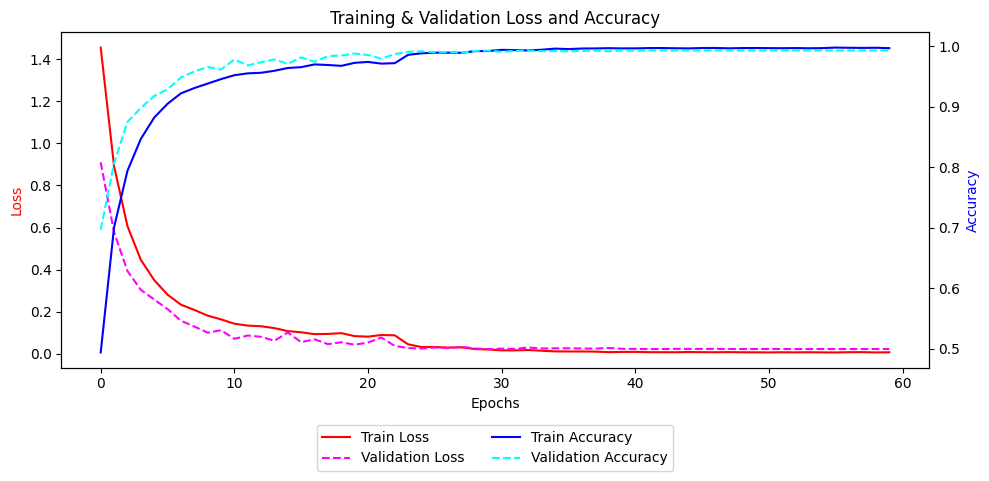

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', color='red', linestyle='-')
plt.plot(history.history['val_loss'], label='Validation Loss', color='magenta', linestyle='--')

ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(history.history['accuracy'], label='Train Accuracy', color='blue', linestyle='-')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan', linestyle='--')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='red')
ax2.set_ylabel('Accuracy', color='blue')
plt.title('Training & Validation Loss and Accuracy')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.85])

plt.show()

Confusion Matrix:


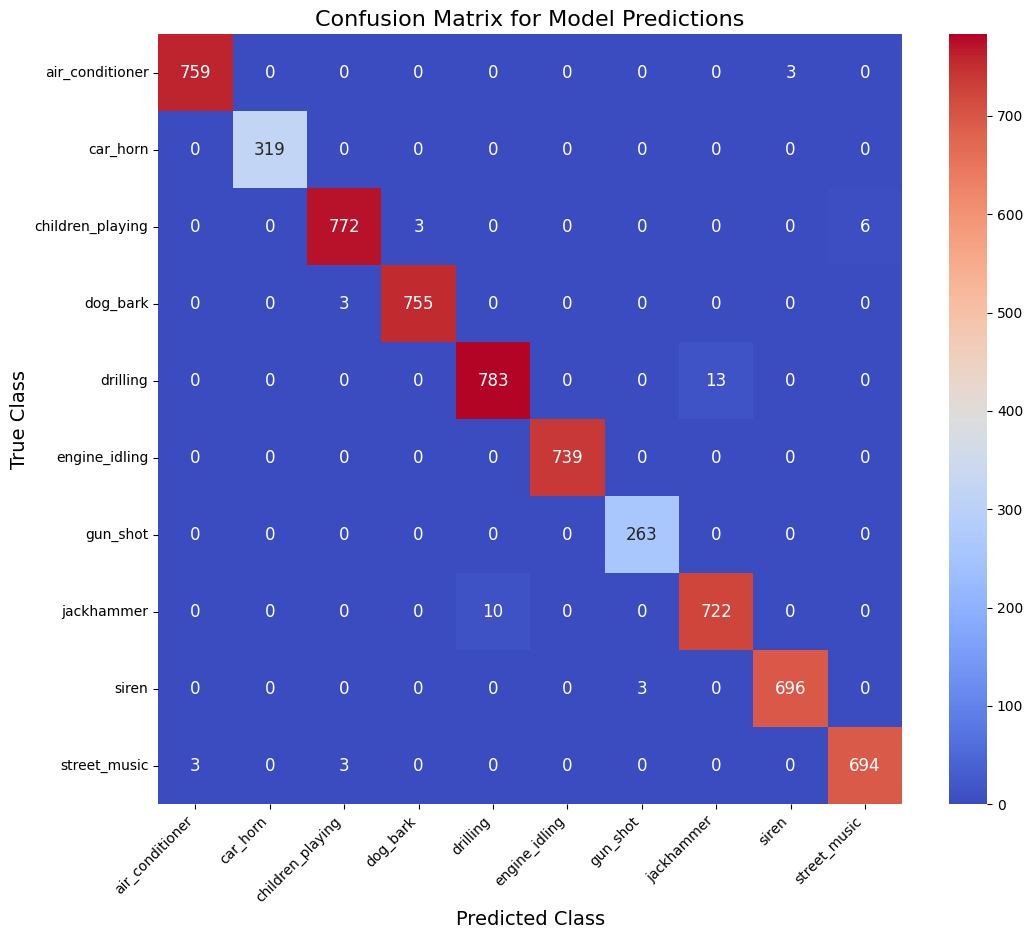

In [39]:
print('Confusion Matrix:')
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=True, annot_kws={"size": 12})

plt.title('Confusion Matrix for Model Predictions', fontsize=16)
plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('True Class', fontsize=14)

class_names = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling',
               'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music']
plt.xticks(np.arange(len(class_names)) + 0.5, class_names, rotation=45, ha='right')
plt.yticks(np.arange(len(class_names)) + 0.5, class_names, rotation=0)
plt.savefig('Confusion Matrix of CNN.pdf', dpi=400, bbox_inches='tight')
plt.show()

In [41]:
print("Classification Report: \n")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

report = report = classification_report(y_true, 
                                        y_pred_classes, 
                                        target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9'],
                                       output_dict=True 
                                       )
print(report)


Classification Report: 

205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
{'Class 0': {'precision': 0.9960629921259843, 'recall': 0.9960629921259843, 'f1-score': 0.9960629921259843, 'support': 762.0}, 'Class 1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 319.0}, 'Class 2': {'precision': 0.9922879177377892, 'recall': 0.9884763124199744, 'f1-score': 0.9903784477228993, 'support': 781.0}, 'Class 3': {'precision': 0.996042216358839, 'recall': 0.996042216358839, 'f1-score': 0.996042216358839, 'support': 758.0}, 'Class 4': {'precision': 0.987389659520807, 'recall': 0.9836683417085427, 'f1-score': 0.9855254877281309, 'support': 796.0}, 'Class 5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 739.0}, 'Class 6': {'precision': 0.9887218045112782, 'recall': 1.0, 'f1-score': 0.994328922495274, 'support': 263.0}, 'Class 7': {'precision': 0.9823129251700681, 'recall': 0.9863387978142076, 'f1-score': 0.9843217450579413, 'support': 732.0}, 'Class 8': {'precision': 0.99570815

In [43]:

import pandas as pd
df_report3 = pd.DataFrame(report).transpose()

#Excel
df_report3.to_excel("classification_report of CNN .xlsx", index=True)

In [ ]:
LSTM

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,Bidirectional,TimeDistributed
from tensorflow.keras.utils import to_categorical

In [47]:
X_train , X_test, y_train, y_test  = train_test_split(X, Y, random_state = 0 )
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [49]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(128))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(layers.Flatten())
model.add(Dropout(0.3))

model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()




Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 128)              │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 832,010 (3.17 MB)

 Trainable params: 832,010 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
earlyStopping = EarlyStopping(
    monitor = 'val_accuracy',
    patience = 20,
    restore_best_weights = True
)

reduceLR = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    factor = 0.5,
    patience = 3,
    min_lr = 1e-5
)
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 200,
    batch_size=100,
    callbacks = [earlyStopping, reduceLR]
)

Epoch 1/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.3494 - loss: 1.8262 - val_accuracy: 0.4921 - val_loss: 1.4018 - learning_rate: 0.0010
Epoch 2/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.5122 - loss: 1.3893 - val_accuracy: 0.5306 - val_loss: 1.3405 - learning_rate: 0.0010
Epoch 3/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.5680 - loss: 1.2572 - val_accuracy: 0.5809 - val_loss: 1.2418 - learning_rate: 0.0010
Epoch 4/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.6104 - loss: 1.1523 - val_accuracy: 0.6465 - val_loss: 1.0564 - learning_rate: 0.0010
Epoch 5/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6563 - loss: 1.0097 - val_accuracy: 0.6621 - val_loss: 0.9797 - learning_rate: 0.0010
Epoch 6/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.6741 - loss: 0.9432 - val_accuracy: 0.7036 - val_loss: 0.8603 - learning_rate: 0.0010
Epoch 7/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.7124 - 

In [53]:
score_LSTM = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {score_LSTM[1]}")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) 
y_true = np.argmax(y_test, axis=1) 
report_dict_lstm = classification_report(y_true, 
                                        y_pred_classes, 
                                        target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9'],
                                       output_dict=True  # 关键：返回字典而非字符串
                                       )
df_report1 = pd.DataFrame(report_dict_lstm).transpose()

# Excel
df_report1.to_excel("classification_report of lstm.xlsx", index=True)

Test Accuracy: 0.9868682026863098
205/205 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step


In [55]:
print(df_report1)

              precision    recall  f1-score      support
Class 0        0.997361  0.992126  0.994737   762.000000
Class 1        0.990536  0.984326  0.987421   319.000000
Class 2        0.977099  0.983355  0.980217   781.000000
Class 3        0.995973  0.978892  0.987359   758.000000
Class 4        0.979975  0.983668  0.981818   796.000000
Class 5        0.997301  1.000000  0.998649   739.000000
Class 6        0.966912  1.000000  0.983178   263.000000
Class 7        0.983651  0.986339  0.984993   732.000000
Class 8        0.994253  0.989986  0.992115   699.000000
Class 9        0.975749  0.977143  0.976445   700.000000
accuracy       0.986868  0.986868  0.986868     0.986868
macro avg      0.985881  0.987583  0.986693  6549.000000
weighted avg   0.986935  0.986868  0.986878  6549.000000


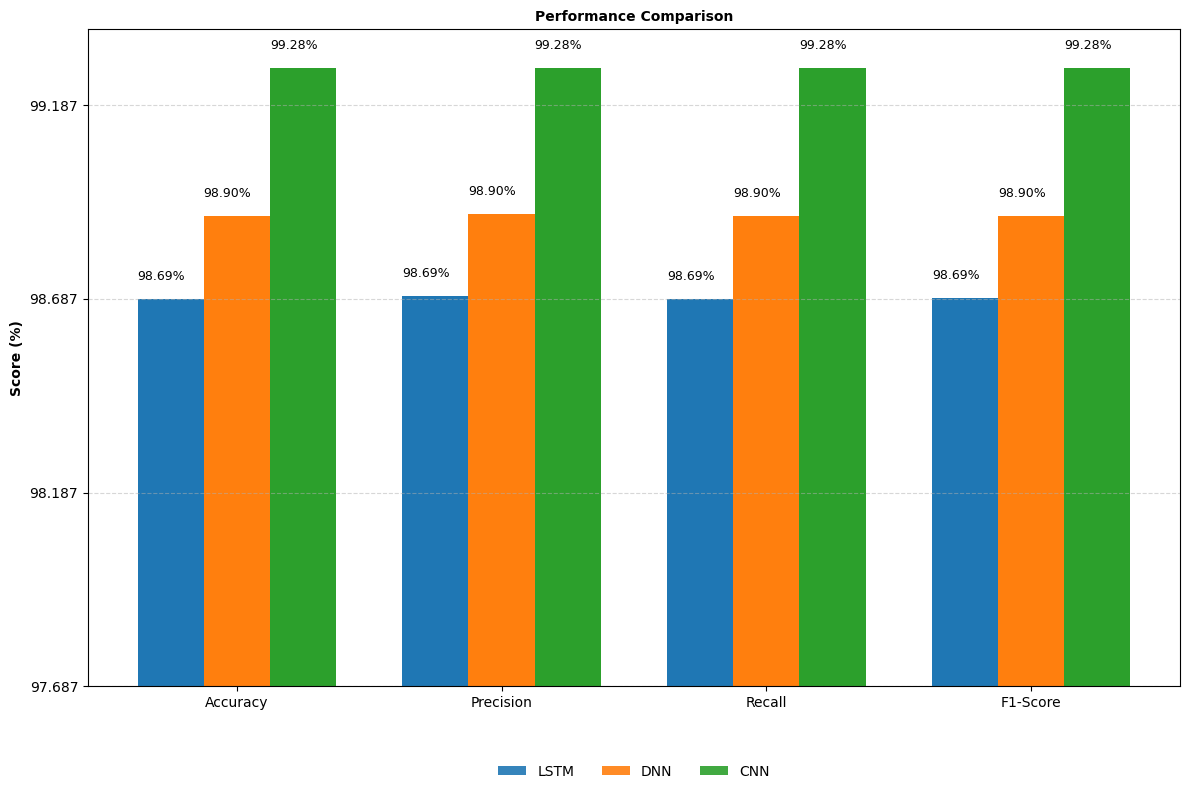

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---------------------- 1. index ----------------------

acc_lstm = score_LSTM[1] * 100
acc_dnn = score_DNN[1] * 100
acc_cnn = score_CNN[1] * 100

# weighted avg的precision/recall/f1-score
lstm_precision = df_report1.loc['weighted avg', 'precision'] * 100
lstm_recall = df_report1.loc['weighted avg', 'recall'] * 100
lstm_f1 = df_report1.loc['weighted avg', 'f1-score'] * 100

dnn_precision = df_report2.loc['weighted avg', 'precision'] * 100
dnn_recall = df_report2.loc['weighted avg', 'recall'] * 100
dnn_f1 = df_report2.loc['weighted avg', 'f1-score'] * 100

cnn_precision = df_report3.loc['weighted avg', 'precision'] * 100
cnn_recall = df_report3.loc['weighted avg', 'recall'] * 100
cnn_f1 = df_report3.loc['weighted avg', 'f1-score'] * 100

# ---------------------- 2. proceeding（ ----------------------
# X axise
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

lstm_scores = [acc_lstm, lstm_precision, lstm_recall, lstm_f1]
dnn_scores = [acc_dnn, dnn_precision, dnn_recall, dnn_f1]
cnn_scores = [acc_cnn, cnn_precision, cnn_recall, cnn_f1]

# define color
colors = {
    'LSTM': '#1f77b4',    # 蓝色
    'DNN': '#ff7f0e',     # 橙色
    'CNN': '#2ca02c'      # 绿色
}

# ---------------------- 3. drawing ----------------------
x = np.arange(len(metrics))  
width = 0.25  
plt.figure(figsize=(12, 8))
plt.bar(x - width, lstm_scores, width, label='LSTM', color=colors['LSTM'], alpha=0.9)
plt.bar(x, dnn_scores, width, label='DNN', color=colors['DNN'], alpha=0.9)
plt.bar(x + width, cnn_scores, width, label='CNN', color=colors['CNN'], alpha=0.9)

# ---------------------- 4. injust ----------------------
min_score = min(min(lstm_scores), min(dnn_scores), min(cnn_scores)) - 1
max_score = max(max(lstm_scores), max(dnn_scores), max(cnn_scores)) + 1
y_ticks = np.arange(min_score, max_score + 0.5, 0.5)
plt.yticks(y_ticks, fontsize=10)

plt.ylabel('Score (%)', fontsize=10, fontweight='bold')
plt.title('Performance Comparison', fontsize=10, fontweight='bold')
plt.xticks(x, metrics, fontsize=10)
plt.ylim(min_score, max_score-0.90)
plt.grid(axis='y', linestyle='--', alpha=0.5)  

def add_percent_label(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() , height + 0.05,
                 f'{height:.2f}%', fontsize=9)

add_percent_label(plt.bar(x - width, lstm_scores, width))
add_percent_label(plt.bar(x, dnn_scores, width))
add_percent_label(plt.bar(x + width, cnn_scores, width))
legend = plt.legend(
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.1),
    ncol=3,  
    frameon=False, 
    fontsize=10,    
    title_fontsize=12
)
legend.get_title().set_fontweight('bold')

plt.tight_layout()
plt.savefig('metrics_comparison_percent.pdf', dpi=400, bbox_inches='tight',
    format='pdf',
    metadata={'Creator': 'Matplotlib'}, 
    facecolor='white', 
    edgecolor='none')
plt.show()
